In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import warnings 

pd.set_option('display.max_rows', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2016

In [ ]:
df_output = {}
drop_list = ['??']

In [145]:
year=2018
df_output[year] = pd.DataFrame()

lvel, lm = [],[]
limit = 100

for tgt_m in range(1,13):
    
    if tgt_m < 10:
        m = f'0{tgt_m}'
    else:
        m = f'{tgt_m}'
        
    try:
        wind = pd.read_csv(f'dados_vento_praticagem/wind_praticagem_{m}{year}.csv',
                           encoding='unicode_escape',
                           sep=';',
                           low_memory=False)


    except OSError as e:
        wind = pd.read_excel(f'dados_vento_praticagem/wind_praticagem_{m}{year}.xlsx')

        cols = ['Date ', ' Time ', 'Visibilidade m ', 'Temperatura °C ',
               'Temperatura min °C ', 'Temperatura max °C ', 'Umidade Relativa % ',
               'Umidade Relativa min % ', 'Umidade Relativa max % ',
               'Pressão Barometrica hPa ', 'Velocidade do Vento kts ',
               'Velocidade do Vento min kts ', 'Velocidade do Vento max kts ',
               'Direção do Vento ° ', 'Precipitação Absoluta mm ',
               'Precipitação Diferenciada mm ', 'Precipitação Intensidade mm/h ']
        
        wind.columns = cols 
    
    if year == 2016:
        if m == '08':
            wind = wind.drop(wind.index[21565]).reset_index(drop=True).copy()
        
        if m == '05':
            wind = wind.drop(wind.index[[4322,4323]]).reset_index(drop=True).copy()

    target_datetime = wind['Date '].astype(str) + ' ' + wind[' Time '].astype(str)

    try:
        datetime = pd.to_datetime(target_datetime,
                                  format='%d/%m/%Y %H:%M:%S')
    except ValueError as ve:
        datetime = pd.to_datetime(target_datetime,
                                  format='%Y-%m-%d %H:%M:%S')
    
    direction = pd.to_numeric(wind['Direção do Vento ° '],
                              errors='coerce')

    if year == 2016:
        if (m == '12') or (m == '11'): 
            vel = pd.to_numeric(wind['Velocidade do Vento kts '],errors='coerce')
            wind = wind[~wind['Velocidade do Vento kts '].isin(drop_list)]
        elif m == '02':
            vel = pd.to_numeric(wind['Velocidade Maxima kts '],errors='coerce')
            wind = wind[~wind['Velocidade Maxima kts '].isin(drop_list)]
        else:
            vel = pd.to_numeric(wind['Velocidade do Vento act kts '],errors='coerce')
            wind = wind[~wind['Velocidade do Vento act kts '].isin(drop_list)]
    else:
            vel = pd.to_numeric(wind['Velocidade do Vento kts '],errors='coerce')
            wind = wind[~wind['Velocidade do Vento kts '].isin(drop_list)]

    lvel.extend(list(vel))
    for i in range(len(vel)): lm.append(m)
    vel[vel > limit] = np.nan
    
    vx = - vel * np.sin(direction)
    vy = - vel * np.cos(direction)
    
    df_parsed = pd.DataFrame()
    
    df_parsed['vx'] = vx
    df_parsed['vy'] = vy
    
    df_parsed.index = datetime
    
    df_resampled = df_parsed.resample('20T').mean()
    
    df_final = pd.DataFrame()
    
    df_final['datetime'] = pd.to_datetime(df_resampled.index)
    df_final['vx'] = df_resampled['vx'].values
    df_final['vy'] = df_resampled['vy'].values
    
    if list(df_final.datetime)[-1].minute == 0 and list(df_final.datetime)[-2].minute == 40:
        df_final = df_final[:-1].copy()
        
    df_final.to_csv(f'dados_vento_parsed/wind_praticagem_{m}{year}.csv')

    print(f'dados_vento_parsed/wind_praticagem_{m}{year}.csv')

    df_output[year] = df_output[year].append(df_final, ignore_index=True)
    
print(f'#############################################')
df_output[year].to_csv(f'dados_vento_final/wind_praticagem_{year}.csv')
print(f'dados_vento_final/wind_praticagem_{year}.csv')

dados_vento_parsed/wind_praticagem_012018.csv
dados_vento_parsed/wind_praticagem_022018.csv
dados_vento_parsed/wind_praticagem_032018.csv
dados_vento_parsed/wind_praticagem_042018.csv


ValueError: time data 01/05/2018 00:00:00 doesn't match format specified

In [146]:
wind

,Date,Time,Visibilidade m,Temperatura °C,Temperatura min °C,Temperatura max °C,Umidade Relativa %,Umidade Relativa min %,Umidade Relativa max %,Pressão Barometrica hPa,...,Velocidade do Vento min kts,Velocidade do Vento max kts,Direção do Vento °,Precipitação Absoluta mm,Precipitação Diferenciada mm,Precipitação Intensidade mm/h,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,01/05/2018,00:00:00,2000.00,23.68,23.66,23.77,93.07,91.60,93.07,1008.49,...,??,??,??,102.51,0.0,0.0,NaN,NaN,NaN,NaN
1,01/05/2018,00:01:00,2000.00,23.66,23.66,23.77,93.27,91.80,93.27,1008.50,...,??,??,??,102.51,0.0,0.0,NaN,NaN,NaN,NaN
2,01/05/2018,00:02:00,2000.00,23.63,23.63,23.77,93.49,92.03,93.49,1008.47,...,??,??,??,102.51,0.0,0.0,NaN,NaN,NaN,NaN
3,01/05/2018,00:03:00,2000.00,23.56,23.56,23.77,93.82,92.03,93.82,1008.46,...,??,??,??,102.51,0.0,0.0,NaN,NaN,NaN,NaN
4,01/05/2018,00:04:00,2000.00,23.56,23.56,23.71,93.90,92.03,93.90,1008.46,...,??,??,??,102.51,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df_output[2016]

,datetime,vx,vy
0,2016-01-01 00:00:00,-0.947397,0.485008
1,2016-01-01 00:20:00,-0.109579,-1.448735
2,2016-01-01 00:40:00,0.163421,-0.951996
3,2016-01-01 01:00:00,0.457733,1.188661
4,2016-01-01 01:20:00,0.887083,-0.940467
...,...,...,...
26347,2016-12-31 22:20:00,0.671082,-1.426791
26348,2016-12-31 22:40:00,0.271541,-0.324122
26349,2016-12-31 23:00:00,0.118777,-0.154339
26350,2016-12-31 23:20:00,-0.386671,-0.028260


In [117]:
df_output[2017]

,datetime,vx,vy
0,2017-01-01 00:00:00,-0.351238,0.531064
1,2017-01-01 00:20:00,0.055595,-0.037717
2,2017-01-01 00:40:00,0.126521,0.178575
3,2017-01-01 01:00:00,0.168913,-0.518334
4,2017-01-01 01:20:00,0.044493,0.016021
...,...,...,...
26131,2017-12-31 22:20:00,-0.796510,-0.976523
26132,2017-12-31 22:40:00,0.602075,-0.290873
26133,2017-12-31 23:00:00,-0.128595,0.209329
26134,2017-12-31 23:20:00,-0.146401,0.075161



########################
##########2016##########
########################


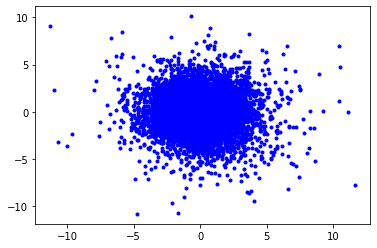

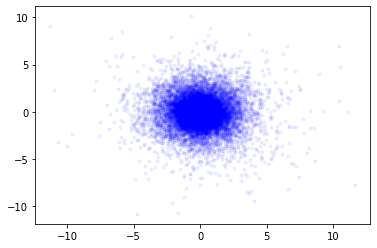

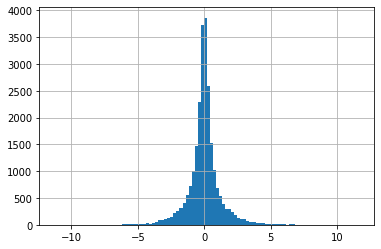

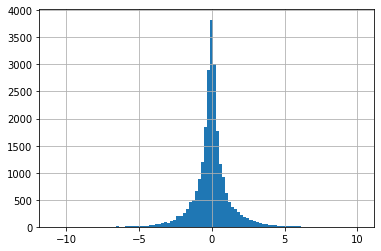

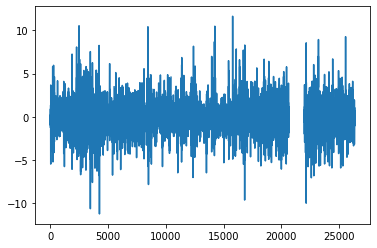


########################
##########2017##########
########################


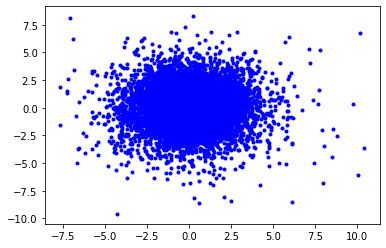

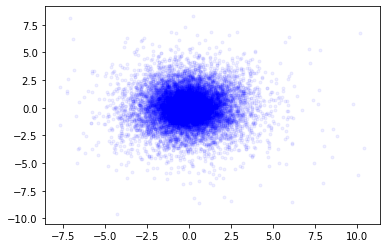

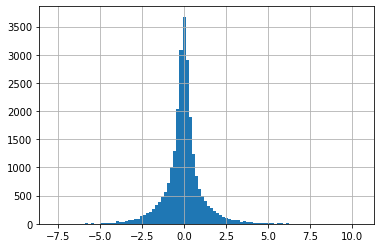

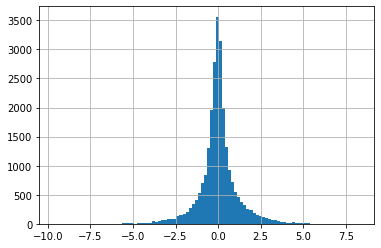

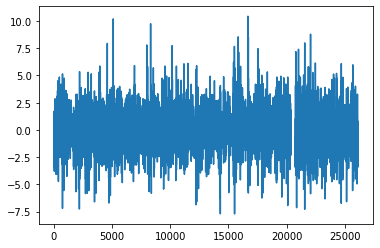

In [120]:
for y in [2016,2017]:
    print(f'\n########################')
    print(f'##########{y}##########')
    print(f'########################')
    
    
    plt.plot(df_output[y].vx, df_output[y].vy,'.',color='#0000FF')
    plt.show()
    
    plt.plot(df_output[y].vx, df_output[y].vy,'.',color='#0000FF0F')
    plt.show()
    
    df_output[y].vx.hist(bins=100)
    plt.show()
    
    df_output[y].vy.hist(bins=100)
    plt.show()
    
    plt.plot(range(len(df_output[y])),df_output[y].vx)
    plt.show()

In [ ]:
#2018 03, 06, 07, 09, 12

In [139]:
_wind = pd.read_excel(f'dados_vento_praticagem/wind_praticagem_032018.xlsx')

cols = ['Date ', ' Time ', 'Visibilidade m ', 'Temperatura °C ',
       'Temperatura min °C ', 'Temperatura max °C ', 'Umidade Relativa % ',
       'Umidade Relativa min % ', 'Umidade Relativa max % ',
       'Pressão Barometrica hPa ', 'Velocidade do Vento kts ',
       'Velocidade do Vento min kts ', 'Velocidade do Vento max kts ',
       'Direção do Vento ° ', 'Precipitação Absoluta mm ',
       'Precipitação Diferenciada mm ', 'Precipitação Intensidade mm/h ']

_wind.columns = cols

In [138]:
_wind

,Date,Time,Visibilidade m,Temperatura °C,Temperatura min °C,Temperatura max °C,Umidade Relativa %,Umidade Relativa min %,Umidade Relativa max %,Pressão Barometrica hPa,Velocidade do Vento kts,Velocidade do Vento min kts,Velocidade do Vento max kts,Direção do Vento °,Precipitação Absoluta mm,Precipitação Diferenciada mm,Precipitação Intensidade mm/h
0,2018-03-01,00:00:00,2000.0,25.77,25.75,25.92,92.03,91.29,92.03,1006.23,1.68,0.00,3.66,174.96,49.27,0.0,0.0
1,2018-03-01,00:01:00,2000.0,25.76,25.75,25.92,92.17,91.29,92.17,1006.21,1.63,0.00,3.66,166.46,49.27,0.0,0.0
2,2018-03-01,00:02:00,2000.0,25.76,25.75,25.92,92.26,91.31,92.26,1006.13,1.62,0.00,3.66,171.02,49.27,0.0,0.0
3,2018-03-01,00:03:00,2000.0,25.79,25.75,25.92,92.38,91.31,92.38,1006.13,1.36,0.00,3.66,159.62,49.27,0.0,0.0
4,2018-03-01,00:04:00,2000.0,25.71,25.71,25.92,92.53,91.40,92.53,1006.13,1.99,0.00,3.66,176.46,49.27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44322,2018-03-31,23:55:00,2000.0,23.94,23.76,23.94,99.88,99.88,100.00,1003.73,4.70,0.00,8.21,353.03,47.55,0.0,0.6
44323,2018-03-31,23:56:00,2000.0,23.87,23.76,23.94,99.57,99.57,100.00,1003.72,4.84,0.00,8.21,357.01,47.55,0.0,0.0
44324,2018-03-31,23:57:00,2000.0,23.90,23.78,23.94,99.81,99.57,100.00,1003.63,3.86,0.00,8.21,353.97,47.55,0.0,0.0
44325,2018-03-31,23:58:00,2000.0,24.00,23.79,24.00,99.58,99.57,100.00,1003.63,6.76,1.45,8.46,2.59,47.55,0.0,0.0


In [132]:
cols = ['Date ', ' Time ', 'Visibilidade m ', 'Temperatura °C ',
       'Temperatura min °C ', 'Temperatura max °C ', 'Umidade Relativa % ',
       'Umidade Relativa min % ', 'Umidade Relativa max % ',
       'Pressão Barometrica hPa ', 'Velocidade do Vento kts ',
       'Velocidade do Vento min kts ', 'Velocidade do Vento max kts ',
       'Direção do Vento ° ', 'Precipitação Absoluta mm ',
       'Precipitação Diferenciada mm ', 'Precipitação Intensidade mm/h ']

In [131]:
wind.columns

Index(['Date ', ' Time ', 'Visibilidade m ', 'Temperatura °C ',
       'Temperatura min °C ', 'Temperatura max °C ', 'Umidade Relativa % ',
       'Umidade Relativa min % ', 'Umidade Relativa max % ',
       'Pressão Barometrica hPa ', 'Velocidade do Vento kts ',
       'Velocidade do Vento min kts ', 'Velocidade do Vento max kts ',
       'Direção do Vento ° ', 'Precipitação Absoluta mm ',
       'Precipitação Diferenciada mm ', 'Precipitação Intensidade mm/h '],
      dtype='object')